In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sys
sys.path.append('..')
from dataset import batcher

In [5]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [45]:
# Get test split
# bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SW_IR1', 'SW_IR2', 'TEMP', 'VIIRS']
bands = ['VIIRS']
test_batcher = batcher.Batcher(bands, country_year='malawi-2016', bucket=False, shuffle=False, split='custom', repeat=1, batch_size=3511).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 1)


In [62]:
# Load model
experiments = ['imagery_sample_cnn_regression_NL_256']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [63]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
    loss=LOSS,
    optimizer=OPT,
    metrics=METRICS,
)

y_preds = trained_model.predict(x_true)
print(y_preds)

 2/21 [=>............................] - ETA: 1s

2023-02-22 09:34:05.878183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 114ms/step
[[-1.4294553 ]
 [-0.6074198 ]
 [ 0.25074366]
 [-1.2729018 ]
 [-1.148316  ]
 [-1.3582152 ]
 [-1.3102233 ]
 [ 0.17388947]
 [-1.3494345 ]
 [-0.9822745 ]
 [-0.8890749 ]
 [-1.1435885 ]
 [-1.5312047 ]
 [-0.8495296 ]
 [ 1.739211  ]
 [-1.3131582 ]
 [-0.68421715]
 [-1.6710513 ]
 [ 1.0560561 ]
 [-1.0077007 ]
 [-1.3494345 ]
 [-1.1509411 ]
 [ 0.12157415]
 [ 0.07691284]
 [-1.2680533 ]
 [-1.0414238 ]
 [-0.9227281 ]
 [-1.2532272 ]
 [-1.3854632 ]
 [-1.1790851 ]
 [ 1.1241059 ]
 [-1.5497035 ]
 [ 0.05287532]
 [ 0.07691284]
 [-1.4593052 ]
 [-1.3990319 ]
 [-1.197402  ]
 [-0.9986356 ]
 [ 0.00769941]
 [-1.3721919 ]
 [-1.1278583 ]
 [-1.1921566 ]
 [-1.2630647 ]
 [ 0.6620399 ]
 [-0.66348696]
 [-1.132057  ]
 [ 0.05322469]
 [-1.3813167 ]
 [ 0.46603355]
 [-1.3247495 ]
 [ 0.09640274]
 [-1.2706897 ]
 [-0.01470225]
 [ 0.18869342]
 [-1.3838155 ]
 [-1.3976009 ]
 [-1.1654446 ]
 [ 0.07712366]
 [-1.3854632 ]
 [ 0.33114338]
 [-1.2707965 ]
 [-1.1146357 ]
 [-1.1790851 ]


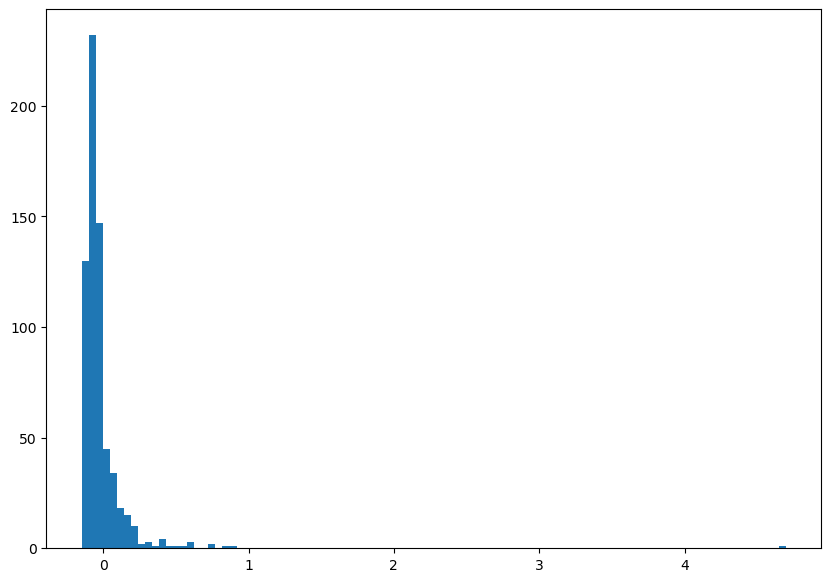

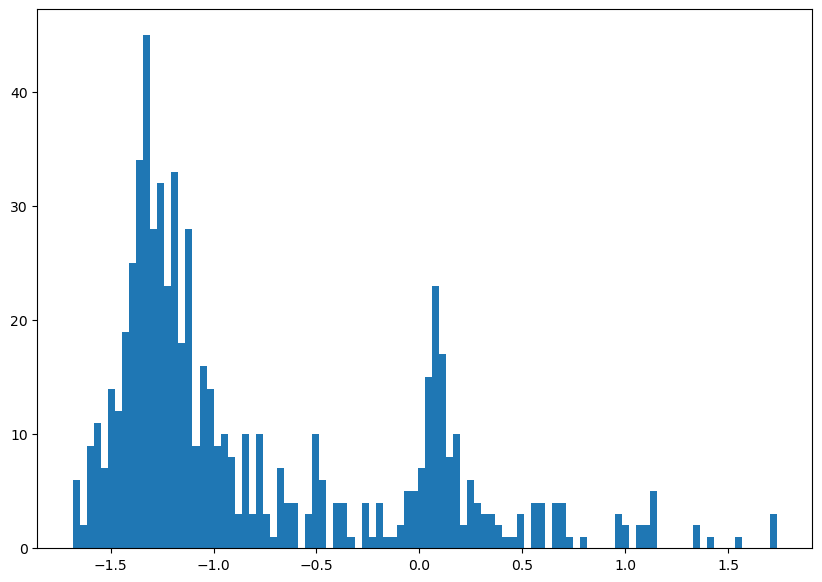

In [64]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

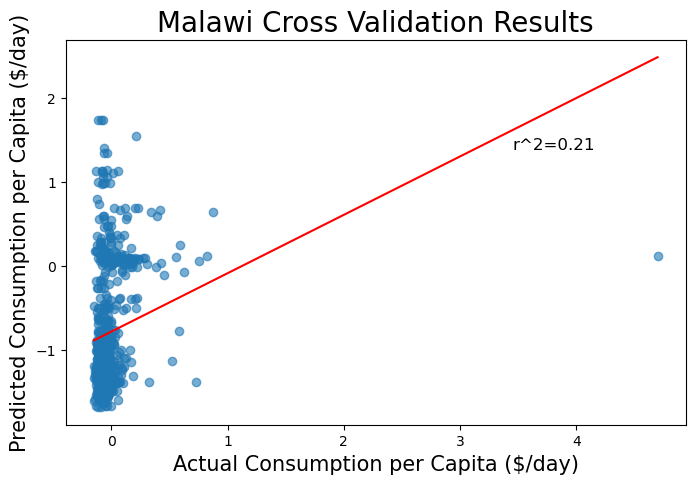

In [65]:
# Plot predictions
country = 'Malawi'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()